# tp 

## import 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Données d'entraînement

In [30]:
X = np.array([420, 380, 350, 400, 440, 380, 450, 420], dtype=float)
Y = np.array([5.5, 6.0, 6.5, 6.0, 5.0, 6.5, 4.5, 5.0], dtype=float)
n = len(X)

## 2. representation nuage

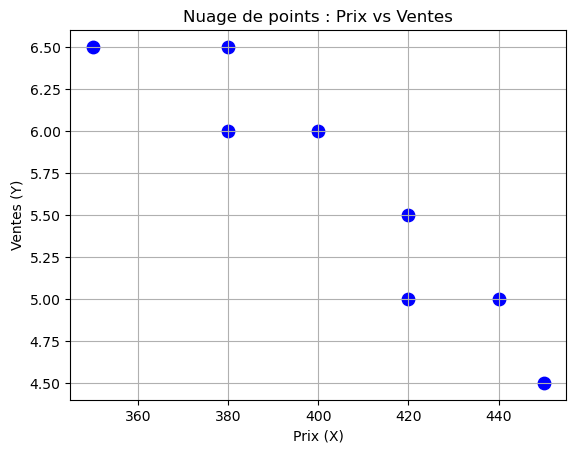

In [31]:
plt.scatter(X, Y, color='blue', s=80)
plt.title("Nuage de points : Prix vs Ventes")
plt.xlabel("Prix (X)")
plt.ylabel("Ventes (Y)")
plt.grid(True)
plt.show()


In [32]:
#quand le prix augmente, les ventes diminuent

## 3.calcul de beta0 et beta1 analytiquement 

In [33]:
X_mean, Y_mean = np.mean(X), np.mean(Y)
beta1 = np.sum((X - X_mean)*(Y - Y_mean)) / np.sum((X - X_mean)**2)
beta0 = Y_mean - beta1 * X_mean

print(f"β₀ = {beta0:.4f}")
print(f"β₁ = {beta1:.6f}")

β₀ = 13.9781
β₁ = -0.020625


## 4. Tracer la droite de régression obtenue

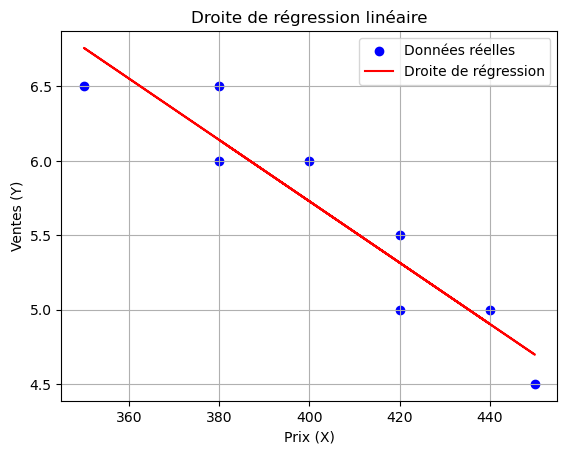

In [34]:
Y_pred = beta0 + beta1 * X

plt.scatter(X, Y, color='blue', label='Données réelles')
plt.plot(X, Y_pred, color='red', label='Droite de régression')
plt.title("Droite de régression linéaire")
plt.xlabel("Prix (X)")
plt.ylabel("Ventes (Y)")
plt.legend()
plt.grid(True)
plt.show()


## 5. Calcul des performances du modèle (RSS)

In [35]:
RSS = np.sum((Y - Y_pred)**2)


print(f"RSS = {RSS:.4f}")



RSS = 0.4719


## 6. Normalisation (centrage-réduction)

In [36]:
X_std = np.std(X)
Y_std = np.std(Y)

X_norm = (X - X_mean) / X_std
Y_norm = (Y - Y_mean) / Y_std

beta1_prime = beta1 * (X_std / Y_std)
beta0_prime = 0

print(f"β₀′ = {beta0_prime:.4f}")
print(f"β₁′ = {beta1_prime:.4f}")


β₀′ = 0.0000
β₁′ = -0.9371


In [37]:
#Une augmentation d’un écart-type du prix fait baisser les ventes d’environ 0.94 écart-type.

## 7. Descente de gradient pour estimer β₀ et β₁

In [38]:
Y_centered = Y - Y_mean
alpha = 0.1       # taux d'apprentissage
max_iter = 5000
tol = 1e-8

b0, b1 = 0.0, 0.0
J_history = []

for i in range(max_iter):
    Y_pred_gd = b0 + b1 * X_norm
    error = Y_pred_gd - Y_centered
    grad_b0 = (1/n) * np.sum(error)
    grad_b1 = (1/n) * np.sum(error * X_norm)
    b0 -= alpha * grad_b0
    b1 -= alpha * grad_b1
    J = (1/(2*n)) * np.sum((Y_centered - (b0 + b1*X_norm))**2)
    J_history.append(J)
    if i > 0 and abs(J_history[-2] - J_history[-1]) < tol:
        print(f"Convergence atteinte à l’itération {i}")
        break

print(f"β₀' (GD) = {b0:.6f}")
print(f"β₁' (GD) = {b1:.6f}")


Convergence atteinte à l’itération 73
β₀' (GD) = -0.000000
β₁' (GD) = -0.651952


## 8. Visualisation de la fonction de coût J

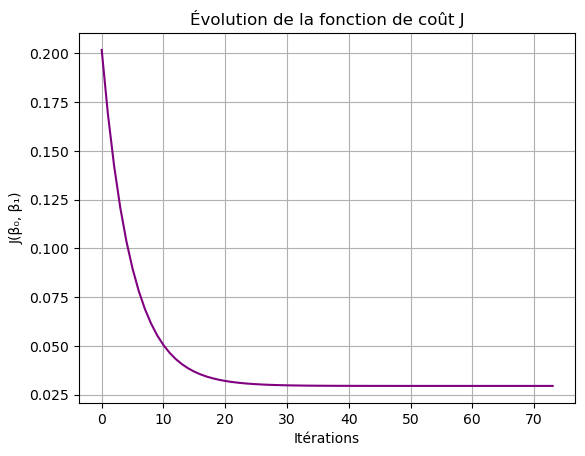

In [39]:
plt.plot(J_history, color='purple')
plt.title("Évolution de la fonction de coût J")
plt.xlabel("Itérations")
plt.ylabel("J(β₀, β₁)")
plt.grid(True)
plt.show()


## 9. Comparaison Analytique vs Gradient

In [40]:
# Conversion des coefficients GD vers échelle réelle
beta1_gd = b1 / X_std
beta0_gd = Y_mean + b0 - b1 * (X_mean / X_std)

Y_pred_gd = b0 + b1 * X
Rss_gd =  np.sum((Y - Y_pred_gd)**2) 

print(" COMPARAISON ")
print(f"Analytique : β₀={beta0:.4f}, β₁={beta1:.6f}, RSS={RSS:.4f}")
print(f"Gradient    : β₀={beta0_gd:.4f}, β₁={beta1_gd:.6f}, RSS={Rss_gd:.4f}")


 COMPARAISON 
Analytique : β₀=13.9781, β₁=-0.020625, RSS=0.4719
Gradient    : β₀=13.9747, β₁=-0.020617, RSS=584944.5451


## 10. Visualisation finale

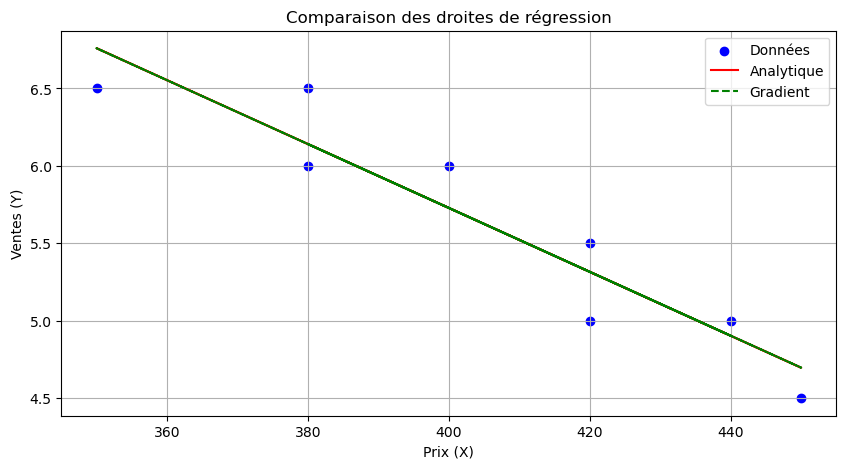

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(X, Y, color='blue', label='Données')
plt.plot(X, beta0 + beta1*X, color='red', label='Analytique')
plt.plot(X, beta0_gd + beta1_gd*X, color='green', linestyle='--', label='Gradient')
plt.title("Comparaison des droites de régression")
plt.xlabel("Prix (X)")
plt.ylabel("Ventes (Y)")
plt.legend()
plt.grid(True)
plt.show()


## tester le modele ensemble de test

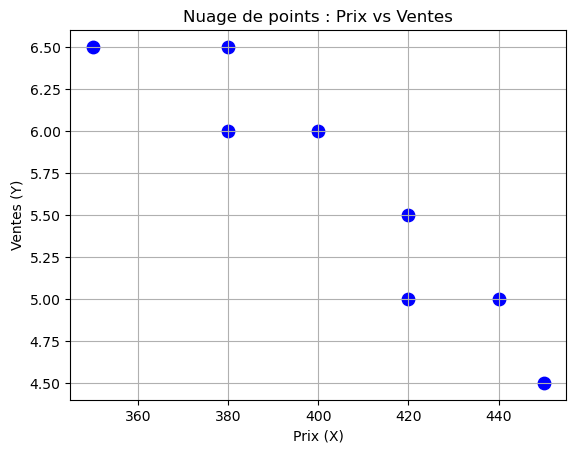

In [46]:
Xprime = np.array([360,380,400,420,440,450],dtype=float)
Yprime= np.array([6.6 , 6.04 , 5.73  ,5.4  , 4.84 , 4.6],dtype=float)
m = len(Xprime)
plt.scatter(X, Y, color='blue', s=80)
plt.title("Nuage de points : Prix vs Ventes")
plt.xlabel("Prix (X)")
plt.ylabel("Ventes (Y)")
plt.grid(True)
plt.show()

In [47]:
xprime_mean= np.mean(Xprime) 
yprime_mean  =np.mean(Yprime)
bet1 = np.sum((Xprime-xprime_mean)*(Yprime - yprime_mean)) / np.sum((Xprime - xprime_mean)**2)
bet0 = yprime_mean - bet1 * xprime_mean

print(f"beta0 = { bet0: .4f}")
print(f"beta1 = { bet1 : .6f}")

beta0 =  14.2577
beta1 = -0.021362


In [51]:
Yprime_pred = bet0 + bet1*Xprime
Rss = np.sum((Yprime - Yprime_pred)**2)
tss = np.sum((Yprime-yprime_mean)**2)
r2 = 1 - Rss /tss

print(f"RSS={ Rss :.6f}",f"TSS={tss:.6f}",f"R2={r2 :.6f}")

RSS=0.026804 TSS=2.802750 R2=0.990436
